In [2]:
import numpy as np
import pandas as pd
from igraph import *
import networkx as nx
!pip install cdlib
!pip install leidenalg
!pip install motifcluster
from motifcluster import motifadjacency as mcmo
from sklearn.cluster import KMeans
from scipy import sparse
from scipy import linalg
from numpy import random as rd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.6/228.6 kB 489.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=4261c6a6623e334967331c2aaa1de50de125854f89beee81ce31292868bb3705
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.5 MB/s eta 0:00:0000:0100:010m


In [4]:
!pip3 install sparsebm
!pip3 install cupy
from sparsebm import generate_SBM_dataset
from sparsebm import SBM

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=3db955cc2214e57d38c6dce7fee380a506fa8f640c08a1cde60f8515e4379efa
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.1 MB/s eta 0:00:00a 0:00:010m
  Preparing metadata (setup.py) ... done
  Using cached fastrlock-0.8.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_24_x86_64.whl (46 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [63 lines of output]
      
      -------- Configuring Module: cuda --------
      cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++
      /tmp/tmprbgf004j/a.cpp:1:10: fatal error: cublas_v2.h: No such file or directory
          1 | #include <cublas_v2.h>
       

In [3]:
from sklearn.cluster import SpectralClustering

In [4]:
# df = pd.read_csv('https://raw.githubusercontent.com/purplesmurf45/Migration-visualisation/main/data/dest.csv')
udf = pd.read_csv('https://raw.githubusercontent.com/purplesmurf45/Migration-visualisation/main/data/updated_refugees_without_unknown.csv')

In [5]:
print(udf.columns)
udf

Index(['Year', 'Origin', 'Destination', 'Refugees'], dtype='object')


,Year,Origin,Destination,Refugees
0,2000,Iraq,Albania,9
1,2000,Serbia and Kosovo: S/RES/1244 (1999),Albania,507
2,2000,Türkiye,Albania,5
3,2000,Chad,Algeria,20
4,2000,Cameroon,Algeria,5
...,...,...,...,...
75501,2021,Rwanda,Zimbabwe,660
75502,2021,Somalia,Zimbabwe,13
75503,2021,Sudan,Zimbabwe,8
75504,2021,South Sudan,Zimbabwe,8


In [6]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
udf['node_dest']= label_encoder.fit_transform(udf['Destination'])
udf['node_ori']= label_encoder.fit_transform(udf['Origin'])
udf['Refugees'] = udf['Refugees'].replace(np.nan, 0)

#Drop other columns
# df = df.drop(['Refugees assisted by UNHCR', 'Refugee-like situations', 'Total refugees and people in refugee-like situations assisted by UNHCR', 'Not refugee situation'], axis=1)

#Remove zero-weighted edges
# for i in range(df.shape[0]):
#     if df['Refugees'][i] <= 0:
#         df.drop([i])
# df['node_dest'].unique()

In [7]:
udf

,Year,Origin,Destination,Refugees,node_dest,node_ori
0,2000,Iraq,Albania,9,1,84
1,2000,Serbia and Kosovo: S/RES/1244 (1999),Albania,507,1,156
2,2000,Türkiye,Albania,5,1,184
3,2000,Chad,Algeria,20,2,34
4,2000,Cameroon,Algeria,5,2,30
...,...,...,...,...,...,...
75501,2021,Rwanda,Zimbabwe,660,178,147
75502,2021,Somalia,Zimbabwe,13,178,163
75503,2021,Sudan,Zimbabwe,8,178,168
75504,2021,South Sudan,Zimbabwe,8,178,165


In [8]:
udf.isnull().sum()

Year           0
Origin         0
Destination    0
Refugees       0
node_dest      0
node_ori       0
dtype: int64

In [9]:
print(len(pd.concat([udf["node_dest"],udf["node_ori"]]).unique()))

199


In [10]:
print(len(udf["node_dest"].unique()))
print(len(udf["node_ori"].unique()))

179
199


In [11]:
node_set = 199

# Node Percolation Centrality Filtering

In [12]:
# def get_percolation_values(df, year):
#     g = Graph(directed=True)
#     g.add_vertices(node_set)
#     dfx = df[df['Year'] == year]
# #     dfx = df
#     # Add ids and labels to vertices
#     for i in range(len(g.vs)):
#         g.vs[i]["id"]= i
#         g.vs[i]["label"]= str(i)
#     # Add edges
#     for i in list(dfx.index):
#         g.add_edge(dfx['node_ori'][i], dfx['node_dest'][i], weight = dfx['Refugees'][i], label= dfx['Refugees'][i])
#     G = g.to_networkx()
#     nx.set_node_attributes(G, 0.1, 'percolation')
#     wts = nx.percolation_centrality(G, weight = 'weight')
#     return wts
    

In [13]:
# y2000 = get_percolation_values(udf, 2000)

In [14]:
# y2000

In [15]:
# sum_dict = y2000
# for i in range(2001, 2022):
#     wts = get_percolation_values(udf, i)
#     for j in sum_dict.keys():
#         sum_dict[j] += wts[j]
#     print(i)


In [16]:
# sum_dict

In [17]:
# # zero_counter = 0
# zero_list = []
# for i in sum_dict.items():
#     if i[1] == 0.0:
#         zero_list.append(i[0])
# #         zero_counter += 1
# #         print(i)
# print(zero_list)
# print(len(zero_list))

In [18]:
zero_list = [11, 22, 24, 32, 46, 51, 53, 64, 65, 69, 80, 85, 89, 93, 104, 105, 110, 115, 119, 129, 131, 135, 136, 142, 143, 149, 152, 157, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]

In [19]:
print(len(zero_list))
label_encoder.inverse_transform(zero_list)

49


array(['Bahamas', 'Botswana', 'Brunei Darussalam', 'Cayman Islands',
       'Curacao ', 'Denmark', 'Dominica', 'Finland', 'France', 'Germany',
       'Iceland', 'Ireland', 'Japan', 'Kiribati', 'Luxembourg',
       'Madagascar', 'Malta', 'Monaco', 'Mozambique', 'Niue', 'Norway',
       'Panama', 'Papua New Guinea', 'Qatar', 'Rep. of Korea',
       'Saint Lucia', 'San Marino', 'Seychelles', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkmenistan',
       'Turks and Caicos Islands', 'Tuvalu', 'Türkiye', 'Uganda',
       'Ukraine', 'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Rep. of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Venezuela (Bolivarian Republic of)', 'Viet Nam',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)

In [20]:
filtered = udf[~udf['node_dest'].isin(zero_list)]
filtered = filtered[~filtered['node_ori'].isin(zero_list)]
filtered

,Year,Origin,Destination,Refugees,node_dest,node_ori
0,2000,Iraq,Albania,9,1,84
1,2000,Serbia and Kosovo: S/RES/1244 (1999),Albania,507,1,156
3,2000,Chad,Algeria,20,2,34
4,2000,Cameroon,Algeria,5,2,30
5,2000,Congo,Algeria,30,2,41
...,...,...,...,...,...,...
75487,2021,Sierra Leone,Zambia,5,177,158
75488,2021,Somalia,Zambia,3540,177,163
75489,2021,Sudan,Zambia,29,177,168
75490,2021,South Sudan,Zambia,5,177,165


In [21]:
print(filtered.isnull().sum())
print(len(pd.concat([filtered["node_dest"],filtered["node_ori"]]).unique()))
print(len(filtered["node_dest"].unique()))
print(len(filtered["node_ori"].unique()))

Year           0
Origin         0
Destination    0
Refugees       0
node_dest      0
node_ori       0
dtype: int64
150
150
150


In [22]:
fil_wo = filtered
fil_wo = fil_wo.drop(['node_dest','node_ori'], axis = 1)
fil_wo

,Year,Origin,Destination,Refugees
0,2000,Iraq,Albania,9
1,2000,Serbia and Kosovo: S/RES/1244 (1999),Albania,507
3,2000,Chad,Algeria,20
4,2000,Cameroon,Algeria,5
5,2000,Congo,Algeria,30
...,...,...,...,...
75487,2021,Sierra Leone,Zambia,5
75488,2021,Somalia,Zambia,3540
75489,2021,Sudan,Zambia,29
75490,2021,South Sudan,Zambia,5


In [23]:
# label_encoder object knows how to understand word labels.
le1 = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
fil_wo['node_dest']= le1.fit_transform(fil_wo['Destination'])
fil_wo['node_ori']= le1.fit_transform(fil_wo['Origin'])
fil_wo

,Year,Origin,Destination,Refugees,node_dest,node_ori
0,2000,Iraq,Albania,9,1,73
1,2000,Serbia and Kosovo: S/RES/1244 (1999),Albania,507,1,129
3,2000,Chad,Algeria,20,2,30
4,2000,Cameroon,Algeria,5,2,27
5,2000,Congo,Algeria,30,2,37
...,...,...,...,...,...,...
75487,2021,Sierra Leone,Zambia,5,149,130
75488,2021,Somalia,Zambia,3540,149,135
75489,2021,Sudan,Zambia,29,149,140
75490,2021,South Sudan,Zambia,5,149,137


In [24]:
print(len(pd.concat([fil_wo["node_dest"],fil_wo["node_ori"]]).unique()))

150


In [25]:
#1.7842870386334853
# 1.7842870386334846

# Community Detection

In [28]:
node_set = 199

In [29]:
def print_freq_table(array):
    unique, counts = np.unique(array, return_counts=True)
#     print(np.asarray((unique, counts)).T)
    return unique, counts

In [26]:
import leidenalg
from cdlib import NodeClustering 


def get_communities(df, year, cd, weighted, nodess):
    g = Graph(directed=True)
    g.add_vertices(nodess)
    dfx = df[df['Year'] == year]
    # Add ids and labels to vertices
    for i in range(len(g.vs)):
        g.vs[i]["id"]= i
        g.vs[i]["label"]= str(i)
    # Add edges
    for i in list(dfx.index):
        g.add_edge(dfx['node_ori'][i], dfx['node_dest'][i], weight = dfx['Refugees'][i], label= dfx['Refugees'][i])
    if cd == 'info':
        if weighted == 1:
            return g.community_infomap(edge_weights='weight')
        else:
            return g.community_infomap()
    elif cd == 'label':
        if weighted == 1:
            return g.community_label_propagation(weights=g.es['weight'])
        else:
            return g.community_label_propagation()
    elif cd == 'modn':
        part = leidenalg.find_partition(
        g,
        leidenalg.RBConfigurationVertexPartition,
        resolution_parameter=1,
        initial_membership=None,
        weights=[x["weight"] for x in g.es],
    )
        return part

In [27]:
def get_comms_from_vertex_clustering(vc):
    temp_arr = np.zeros(vc.n, dtype='int')
    for i in range(len(vc)):
        for j in range(len(vc[i])):
            temp_arr[vc[i][j]] = i
    unique, counts = np.unique(temp_arr, return_counts=True)
    comms = [[y for y in range(len(temp_arr)) if temp_arr[y]==x] for x in unique]
    return comms

In [28]:
labels_slpa1=get_communities(udf, 2016,'modn', 1,199)
labels_slpa3=get_communities(fil_wo, 2016,'modn', 1,150)
comms_spectral_g1 = NodeClustering(get_comms_from_vertex_clustering(labels_slpa1), graph=None, method_name="slpa")
comms_spectral_g3 = NodeClustering(get_comms_from_vertex_clustering(labels_slpa3), graph=None, method_name="slpa")

In [33]:
from cdlib import evaluation
from cdlib import NodeClustering
def get_nx_graph(df, year, num_nodes):
    g = Graph(directed=True)
#     num_nodes = len(pd.concat([df["node_dest"],df["node_ori"]]).unique())
    g.add_vertices(num_nodes)
    dfx = df[df['Year'] == year]
    # Add ids and labels to vertices
    for i in range(len(g.vs)):
        g.vs[i]["id"]= i
        g.vs[i]["label"]= str(i)
    # Add edges
    for i in list(dfx.index):
        g.add_edge(dfx['node_ori'][i], dfx['node_dest'][i], weight = dfx['Refugees'][i], label= dfx['Refugees'][i])
    G = g.to_networkx()
    return G
G1 = get_nx_graph(udf, 2016, 199)
G3 = get_nx_graph(fil_wo, 2016, 150)

In [34]:
print("MODN")
# print("Link modularity = ")
mod_spectral_g1 = evaluation.link_modularity(G1, comms_spectral_g1)
mod_spectral_g3 = evaluation.link_modularity(G3, comms_spectral_g3)
print(mod_spectral_g1.score, ',', mod_spectral_g3.score)
# print("Internal_edge_density = ")
mod_spectral_g1 = evaluation.internal_edge_density(G1, comms_spectral_g1)
mod_spectral_g3 = evaluation.internal_edge_density(G3, comms_spectral_g3)
print(mod_spectral_g1.score, ',', mod_spectral_g3.score)
# print("Average_internal_degree = ")
mod_spectral_g1 = evaluation.average_internal_degree(G1, comms_spectral_g1)
mod_spectral_g3 = evaluation.average_internal_degree(G3, comms_spectral_g3)
print(mod_spectral_g1.score, ',', mod_spectral_g3.score)
# print("Cut ratio = ")
mod_spectral_g1 = evaluation.cut_ratio(G1, comms_spectral_g1)
mod_spectral_g3 = evaluation.cut_ratio(G3, comms_spectral_g3)
print(mod_spectral_g1.score, ',', mod_spectral_g3.score)
# print("Z modularity = ")
mod_spectral_g1 = evaluation.z_modularity(G1, comms_spectral_g1)
mod_spectral_g3 = evaluation.z_modularity(G3, comms_spectral_g3)
print(mod_spectral_g1.score, ',', mod_spectral_g3.score)

MODN
0.02283070200267864 , 0.024581327107366314
0.38046701939212557 , 0.43905271684962677
4.1804325113603475 , 6.5608278764133185
0.07969935004758331 , 0.1369149158332173
0.07833088263494217 , 0.044920055702872184


In [34]:
# un,cou = print_freq_table(get_communities(udf, 2005, "info", 1)._membership)
# print(un)
# print(cou)
# print(get_communities(udf, 2005, "info", 1)._len)
# for i in range (2000,2019):
# #     un,cou = print_freq_table(get_spectral_communities(udf, i, 'sparseBM', 12))
#     un,cou = print_freq_table(get_spectral_communities(fil_wo, i, 'spectral', 12))
#     print(len(un))
#     print(max(cou))
#     print("info",get_communities(udf, i, "info", 1).n)
#     print("slpa",get_communities(udf, i, "slpa", 1))
#     print("modn",get_communities(udf, i, "modn", 1))

In [35]:
orig_modn_comms = [17,19
,17
,16
,20
,19
,13
,13
,14
,13
,13
,14
,14
,13
,12
,13
,13
,12
,11]
orig_info_comms = [20
,25
,15
,7
,18
,24
,11
,14
,8
,7
,11
,6
,6
,6
,7
,6
,6
,6
,6]

In [36]:
def cluster_spectrum(spectrum, num_clusts):

  vects = spectrum["vects"][:, 1:]
  kmeans_plus_plus = KMeans(n_clusters=num_clusts).fit(vects)
  cluster_assigns = kmeans_plus_plus.labels_

  return cluster_assigns


def run_motif_clustering(adj_mat, motif_name,
                         motif_type="struc",
                         mam_weight_type="unweighted",
                         mam_method="sparse",
                         num_eigs=2,
                         type_lap="comb",
                         num_clusts=2,
                         restrict=True,
                         gr_method="sparse"):


  assert motif_type in ["struc", "func"]
  assert mam_weight_type in ["unweighted", "mean", "product"]
  assert mam_method in ["sparse", "dense"]
  assert isinstance(restrict, bool)
  assert type_lap in ["comb", "rw"]

  spectrum = run_motif_embedding(adj_mat, motif_name, motif_type, mam_weight_type,
                                      mam_method, num_eigs, type_lap, restrict, gr_method)

  cluster_assigns = cluster_spectrum(spectrum, num_clusts)

  ans = {
    "adj_mat": adj_mat,
    "motif_adj_mat": spectrum["motif_adj_mat"],
    "comps": spectrum["comps"],
    "adj_mat_comps": spectrum["adj_mat_comps"],
    "motif_adj_mat_comps": spectrum["motif_adj_mat_comps"],
    "vals": spectrum["vals"],
    "vects": spectrum["vects"],
    "clusts": cluster_assigns
  }

  return ans

"""
Functions relating to spectral methods
are in `motifcluster.spectral`.
"""




def _get_first_eigs(some_mat, num_eigs):

  # check args
  assert num_eigs == np.floor(num_eigs)
  assert num_eigs >= 1

  # get spectrum for many eigs
  if num_eigs >= some_mat.shape[0] - 1:

    # make sure matrix is dense
    if sparse.issparse(some_mat):
      some_mat = some_mat.toarray()

    vals, vects = linalg.eig(some_mat)
    ordering = np.argsort(vals.real)
    vals = vals.real[ordering]
    vects = vects.real[:, ordering]
    vals = vals[0:num_eigs]
    vects = vects[:, 0:num_eigs]

  # get spectrum for few eigs
  else:

    # make sure matrix is sparse
    if not sparse.issparse(some_mat):
      some_mat = sparse.csr_matrix(some_mat, dtype="f")

    vals, vects = sparse.linalg.eigs(some_mat, k=num_eigs, which="SM")
    ordering = np.argsort(vals.real)
    vals = vals.real[ordering]
    vects = vects.real[:, ordering]

  # return a list
  spectrum = {
    "vects": vects,
    "vals": vals
  }

  return spectrum


def build_laplacian(adj_mat, type_lap="rw"):


  # check args
  assert type_lap in ["comb", "rw"]
  n = adj_mat.shape[0]

  if not sparse.issparse(adj_mat):
    adj_mat = sparse.csr_matrix(adj_mat)

  # initialize parameters
  degs_adj_mat = adj_mat.sum(axis=0).reshape(n)

  # combinatorial Laplacian
  if type_lap == "comb":
    degs_matrix = sparse.diags(degs_adj_mat, offsets=[0], shape=(n, n))
    L = degs_matrix - adj_mat

  # random-walk Laplacian
  elif type_lap == "rw":
    assert (degs_adj_mat > 0).all()
    inv_degs_matrix = sparse.diags(1 / degs_adj_mat, offsets=[0], shape=(n, n))
    L = sparse.identity(n) - inv_degs_matrix * adj_mat

  L = sparse.csr_matrix(L)

  return L


def run_laplace_embedding(adj_mat, num_eigs, type_lap="rw"):

  
  # check args
  assert num_eigs == np.floor(num_eigs)
  assert num_eigs >= 1
  assert type_lap in ["comb", "rw"]

  # build and embed Laplacian
  laplacian = build_laplacian(adj_mat, type_lap)
  spectrum = _get_first_eigs(laplacian, num_eigs)

  return spectrum


def run_motif_embedding(adj_mat, motif_name,
                        motif_type="struc",
                        mam_weight_type="unweighted",
                        mam_method="sparse",
                        num_eigs=2,
                        type_lap="rw",
                        restrict=True,
                        gr_method="sparse"):


  # check args
  assert motif_name in get_motif_names()
  assert motif_type in ["struc", "func"]
  assert num_eigs == np.floor(num_eigs)
  assert num_eigs >= 1
  assert mam_weight_type in ["unweighted", "mean", "product"]
  assert mam_method in ["sparse", "dense"]
  assert type_lap in ["comb", "rw"]
  assert isinstance(restrict, bool)
  assert gr_method in ["sparse", "dense"]

  if not sparse.issparse(adj_mat):
    adj_mat = sparse.csr_matrix(adj_mat)

  # build motif adjacency matrix
  motif_adj_mat = mcmo.build_motif_adjacency_matrix(adj_mat, motif_name,
                                                    motif_type, mam_weight_type,
                                                    mam_method)

  if restrict:

    # restrict to largest connected component
    comps = get_largest_component(motif_adj_mat, gr_method)

    adj_mat_comps = adj_mat[comps, :].tocsc()[:, comps]
    adj_mat_comps = sparse.csr_matrix(adj_mat_comps)

    motif_adj_mat_comps = motif_adj_mat[comps, :].tocsc()[:, comps]
    motif_adj_mat_comps = sparse.csr_matrix(motif_adj_mat_comps)

    # Laplace embedding restricted
    spect = run_laplace_embedding(motif_adj_mat_comps, num_eigs, type_lap)

  else:
    comps = None
    adj_mat_comps = None
    motif_adj_mat_comps = None

    # Laplace embedding unrestricted
    spect = run_laplace_embedding(motif_adj_mat, num_eigs, type_lap)


  # return list
  embedding = {
    "adj_mat": adj_mat,
    "motif_adj_mat": motif_adj_mat,
    "comps": comps,
    "adj_mat_comps": adj_mat_comps,
    "motif_adj_mat_comps": motif_adj_mat_comps,
    "vals": spect["vals"],
    "vects": spect["vects"],
  }

  return embedding

"""
Assorted utility functions for the motifcluster module
are in `motifcluster.utils`.
"""

import random
import numpy as np
from numpy import random as rd

def _a_b_one(a_mat, b_mat):

  if not sparse.issparse(a_mat):
    a_mat = sparse.csr_matrix(a_mat)

  if not sparse.issparse(b_mat):
    b_mat = sparse.csr_matrix(b_mat)

  n = a_mat.shape[0]
  ones_vec = np.ones(n)
  ans = (a_mat.T.multiply(b_mat @ ones_vec)).T

  return ans


def _a_one_b(a_mat, b_mat):

  if not sparse.issparse(a_mat):
    a_mat = sparse.csr_matrix(a_mat)

  if not sparse.issparse(b_mat):
    b_mat = sparse.csr_matrix(b_mat)

  n = a_mat.shape[0]
  ones_vec = np.ones(n)
  ans = (a_mat.multiply(ones_vec @ b_mat))

  return ans


def _drop0_killdiag(some_mat):

  if sparse.issparse(some_mat):
    I = sparse.identity(some_mat.shape[0])
    ans = some_mat - I.multiply(some_mat)

  else:
    I = np.identity(some_mat.shape[0])
    ans = some_mat - some_mat * I

  return ans


def get_largest_component(adj_mat, gr_method):


  if gr_method == "sparse":

    if not sparse.issparse(adj_mat):
      adj_mat = sparse.csr_matrix(adj_mat)

    gr = nx.from_scipy_sparse_matrix(adj_mat > 0)

  else:

    if isinstance(adj_mat, np.ndarray): # pylint: disable=else-if-used
      gr = nx.from_numpy_array(1 * np.array(adj_mat > 0))

    else:
      gr = nx.from_numpy_array(1 * (adj_mat > 0).toarray())

  verts_to_keep = max(nx.connected_components(gr), key=len)
  verts_to_keep = sorted(verts_to_keep)

  return verts_to_keep


def get_motif_names():

  motif_names = ["Ms", "Md"]

  for i in range(1, 14):
    motif_name = "M" + str(i)
    motif_names = motif_names + [motif_name]

  motif_names = motif_names + ["Mcoll"] + ["Mexpa"]

  return motif_names


def _random_sparse_matrix(m, n, p, sample_weight_type="constant", w=1):

  mn = m * n

  # number of nonzero entries
  k = rd.binomial(mn, p)

  # indices of nonzero entries
  zs = k * [0]
  inds = random.sample(range(mn), k)

  # values to go in matrix
  if sample_weight_type == "constant":
    vals = np.full(k, w)

  elif sample_weight_type == "poisson":
    vals = rd.poisson(w, size=k)

  else:
    vals = np.ones(k)

  # create small matrix
  if mn <= 1e4:
    ans = np.zeros(mn)
    ans[np.array(inds, dtype=int)] = np.array(vals, dtype=int)
    ans = ans.reshape((m, n))

  # create large matrix
  else:
    ans = sparse.csc_matrix((vals, (inds, zs)), shape=(mn, 1))
    ans = ans.reshape((m, n))

  return ans

In [35]:
def get_adj_matrix(df, year, num_nodes):
    g = Graph(directed=True)
#     num_nodes = len(pd.concat([df["node_dest"],df["node_ori"]]).unique())
    g.add_vertices(num_nodes)
    dfx = df[df['Year'] == year]
    # Add ids and labels to vertices
    for i in range(len(g.vs)):
        g.vs[i]["id"]= i
        g.vs[i]["label"]= str(i)
    # Add edges
    for i in list(dfx.index):
        g.add_edge(dfx['node_ori'][i], dfx['node_dest'][i], weight = dfx['Refugees'][i], label= dfx['Refugees'][i])
    G = g.to_networkx()
    adj_mat = nx.to_numpy_array(G)
    return adj_mat

def get_comms_from_list(l):
    comms = []
    unique, counts = np.unique(l, return_counts=True)
    comms = [[y for y in range(len(l)) if l[y]==x] for x in unique]
    return comms

def get_spectral_communities(df, year, cd, num_clusters):
    nodes_num = len(pd.concat([df["node_dest"],df["node_ori"]]).unique())
    adj_mat = get_adj_matrix(df,year,nodes_num)
    if cd == 'spectral':
        sc = SpectralClustering(num_clusters, affinity='precomputed', n_init=10)
        labels = sc.fit_predict(adj_mat)
    elif cd == 'motif':
        motif_algo = run_motif_clustering(adj_mat, "M1",num_eigs=71,num_clusts=num_clusters,restrict=False)
        labels = motif_algo['clusts']
    elif cd == 'sparseBM':
        model = SBM(num_clusters)
        model.fit(adj_mat, symmetric=False)
        labels = model.labels
    return labels
    

In [42]:
def get_cam(df, year, cd, node_set1):
    if cd == 'motif' or cd == 'spectral' or cd == 'sparseBM':
        if year-2000 >= len(orig_info_comms):
            comms = get_spectral_communities(df, year, cd, orig_info_comms[-1])
        else:
            comms = get_spectral_communities(df, year, cd, orig_info_comms[year-2000])
    else:
        comms = get_communities(df, year, cd, 1, node_set1)._membership
    co_matrix = np.zeros((node_set1,node_set1),dtype=int)
    for i in range(node_set1):
        for j in range(node_set1):
            if comms[i] == comms[j] and i != j:
                co_matrix[i][j] = 1
    return co_matrix

In [44]:
# print(2016, get_cam(udf, 2016, 'spectral', node_set))
print(2015, get_cam(udf, 2015, 'info', 199))
# print(2014, get_cam(udf, 2014, 'info', node_set))

2015 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 1 1]
 [0 1 0 ... 1 1 1]
 ...
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 1 0 1]
 [0 1 1 ... 1 1 0]]


In [45]:
def get_pcam(df, year, cd, delta_t, node_set1):
    pcam = np.zeros((node_set1,node_set1),dtype=int)
    for i in range(year-delta_t+1, year+1):
        pcam += get_cam(df, i, cd, node_set1)
    pcam = pcam/delta_t
    return pcam

# Entropy based

In [47]:
# from scipy.stats import entropy

# def get_entropy(cd, delta_t, node_ind):
#     entropy_i = []
#     for i in range(2000+delta_t, 2017):
#         entropy_i.append(node_i_significance(get_pcam(udf, i, cd, delta_t), node_ind))
#     entropy_t = entropy(entropy_i)
#     return entropy_t
    

In [48]:
# entropy_i = []
# for i in range(2000+3, 2017):
#     entropy_i.append(node_i_significance(get_pcam(udf, i, 'info', 3), 104))
# entropy_t = entropy(entropy_i)
# print(entropy_i)
# print(entropy_t)

In [49]:
# entropies = []
# for i in range(node_set):
#     entropy_i = get_entropy('info', 3, i)
#     if entropy_i != np.nan:
#         entropies.append([entropy_i, i])
#         print(i)

In [50]:
# entropies

In [51]:
# entropies.sort()
# entropies

In [52]:
# x = [x[0] for x in entropies]
# y = range(199)
# plt.plot(x,y)
# plt.show()

# Auto-regressive models

In [46]:
# import statsmodels.api as sm
# from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VAR

In [304]:
node_set_size = len(pd.concat([udf["node_dest"],udf["node_ori"]]).unique())
train_data_orig = []
for i in range(2005, 2019):
    print(i)
    train_data_orig.append(get_pcam(udf, i, 'info', 5, node_set_size))
train_data_orig

2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


[array([[0. , 0.2, 0.2, ..., 0.2, 0.2, 0.2],
        [0.2, 0. , 0.2, ..., 1. , 1. , 0.2],
        [0.2, 0.2, 0. , ..., 0.2, 0.2, 0.2],
        ...,
        [0.2, 1. , 0.2, ..., 0. , 1. , 0.2],
        [0.2, 1. , 0.2, ..., 1. , 0. , 0.2],
        [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0. ]]),
 array([[0. , 0.2, 0.2, ..., 0.2, 0.2, 0.2],
        [0.2, 0. , 0.2, ..., 1. , 1. , 0.2],
        [0.2, 0.2, 0. , ..., 0.2, 0.2, 0.2],
        ...,
        [0.2, 1. , 0.2, ..., 0. , 1. , 0.2],
        [0.2, 1. , 0.2, ..., 1. , 0. , 0.2],
        [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0. ]]),
 array([[0. , 0.2, 0.2, ..., 0.2, 0.2, 0.2],
        [0.2, 0. , 0.2, ..., 1. , 1. , 0.2],
        [0.2, 0.2, 0. , ..., 0.2, 0.2, 0.2],
        ...,
        [0.2, 1. , 0.2, ..., 0. , 1. , 0.2],
        [0.2, 1. , 0.2, ..., 1. , 0. , 0.2],
        [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0. ]]),
 array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0.2, ..., 1. , 1. , 0.2],
        [0. , 0.2, 0. , ..., 0.2, 0.2, 0.2],
        ..

In [305]:
test_data_orig = []
for i in range(2019, 2022):
    print(i)
    test_data_orig.append(get_pcam(udf, i, 'info', 5, node_set_size))
test_data_orig

2019
2020
2021


[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 1., 1.],
        [0., 1., 0., ..., 1., 1., 1.],
        ...,
        [0., 1., 1., ..., 0., 1., 1.],
        [0., 1., 1., ..., 1., 0., 1.],
        [0., 1., 1., ..., 1., 1., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 1., 1.],
        [0., 1., 0., ..., 1., 1., 1.],
        ...,
        [0., 1., 1., ..., 0., 1., 1.],
        [0., 1., 1., ..., 1., 0., 1.],
        [0., 1., 1., ..., 1., 1., 0.]]),
 array([[0. , 0.2, 0.2, ..., 0.2, 0.2, 0.2],
        [0.2, 0. , 1. , ..., 1. , 1. , 1. ],
        [0.2, 1. , 0. , ..., 1. , 1. , 1. ],
        ...,
        [0.2, 1. , 1. , ..., 0. , 1. , 1. ],
        [0.2, 1. , 1. , ..., 1. , 0. , 1. ],
        [0.2, 1. , 1. , ..., 1. , 1. , 0. ]])]

In [308]:
il2 = np.tril_indices(node_set_size,-1)
print(train_data_orig[0][il2].shape)
print(il2)
print(il2[0])
print(il2[1])
print(train_data_orig[0][il2].shape)

(19701,)
(array([  1,   2,   2, ..., 198, 198, 198]), array([  0,   0,   1, ..., 195, 196, 197]))
[  1   2   2 ... 198 198 198]
[  0   0   1 ... 195 196 197]
(19701,)


In [315]:
t1_train = np.empty([len(train_data_orig), train_data_orig[0][il2].shape[0]])
for i in range(len(train_data_orig)):
    t1_train[i] = train_data_orig[i][il2]
print(t1_train.shape)
print(t1_train)

df_train_orig = pd.DataFrame(t1_train)
df_train_orig

(14, 19701)
[[0.2 0.2 0.2 ... 0.2 0.2 0.2]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 ...
 [0.4 0.4 1.  ... 1.  1.  1. ]
 [0.2 0.2 1.  ... 1.  1.  1. ]
 [0.  0.  1.  ... 1.  1.  1. ]]


,0,1,2,3,4,5,6,7,8,9,...,19691,19692,19693,19694,19695,19696,19697,19698,19699,19700
0,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.6,0.2,0.6,...,0.2,0.6,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.2,...,0.2,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
2,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
3,0.0,0.0,0.2,0.0,1.0,0.2,0.0,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.0,0.2,0.2,0.2
4,0.2,0.2,0.4,0.2,1.0,0.4,0.0,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
5,0.2,0.2,0.6,0.2,1.0,0.6,0.0,0.2,0.2,0.2,...,0.6,0.6,0.6,0.6,0.6,0.6,0.4,0.6,0.6,0.6
6,0.4,0.4,0.8,0.4,1.0,0.8,0.0,0.2,0.2,0.2,...,0.8,0.8,0.8,0.8,0.8,0.8,0.6,0.8,0.8,0.8
7,0.6,0.6,1.0,0.6,1.0,1.0,0.2,0.4,0.4,0.4,...,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.0,1.0
8,0.8,0.8,1.0,0.8,1.0,1.0,0.4,0.4,0.4,0.4,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0.6,0.6,1.0,0.6,1.0,1.0,0.4,0.6,0.6,0.6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [316]:
t1_test = np.empty([len(test_data_orig), test_data_orig[0][il2].shape[0]])
for i in range(len(test_data_orig)):
    t1_test[i] = test_data_orig[i][il2]
print(t1_test.shape)
print(t1_test)

df_test_orig = pd.DataFrame(t1_test)
df_test_orig

(3, 19701)
[[0.  0.  1.  ... 1.  1.  1. ]
 [0.  0.  1.  ... 1.  1.  1. ]
 [0.2 0.2 1.  ... 1.  1.  1. ]]


,0,1,2,3,4,5,6,7,8,9,...,19691,19692,19693,19694,19695,19696,19697,19698,19699,19700
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.2,0.2,1.0,0.2,1.0,1.0,0.2,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [325]:
from sklearn.feature_selection import VarianceThreshold
def get_new_thresh_df(df, threshold):
    var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
    var_thr.fit(df)

    var_thr.get_support()

    # for i in range(len(var_thr.get_support())):
    #     if i == 'False':
    #         print("Yes")
    concol = [column for column in df.columns 
              if column not in df.columns[var_thr.get_support()]]
    print(len(concol))
    for features in concol:
        print(features, end = " ")
    df_thresh = df.drop(concol,axis=1)

#     for features in concol:
#         print(features)
    return df_thresh, concol

In [326]:
df_train_orig_thresh, concol = get_new_thresh_df(df_train_orig, 0.005)
# df_train_skewed_thresh, concol1 = get_new_thresh_df(df_train_skewed, 0.01)

5917
4 11 13 29 31 33 51 79 81 83 86 92 94 96 99 104 121 123 125 128 133 134 137 139 141 144 149 150 152 154 156 158 161 166 167 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 191 193 195 198 203 204 206 207 208 209 229 232 234 236 239 244 245 247 248 249 250 251 254 256 258 261 266 267 269 270 271 272 273 275 277 279 281 284 289 290 292 293 294 295 296 298 299 319 326 328 330 333 338 339 341 342 343 344 345 347 348 349 370 379 381 383 386 391 392 394 395 396 397 398 400 401 402 404 436 438 440 443 448 449 451 452 453 454 455 457 458 459 461 463 484 497 499 501 504 509 510 512 513 514 515 516 518 519 520 522 524 526 557 580 596 598 600 603 608 609 611 612 613 614 615 617 618 619 621 623 625 627 649 685 722 742 744 746 749 754 755 757 758 759 760 761 763 764 765 767 769 771 773 776 795 799 839 862 864 866 869 874 875 877 878 879 880 881 883 884 885 887 889 891 893 896 900 922 965 991 993 995 998 1003 1004 1006 1007 1008 1009 1010 1012 1013 1014 1016 

In [328]:
model_orig_thresh = VAR(df_train_orig_thresh)
model_orig_thresh_fit = model_orig_thresh.fit()

In [330]:
y_orig_thresh = model_orig_thresh_fit.forecast(model_orig_thresh_fit.endog, steps=3)
y_orig_thresh

array([[-0.10677794, -0.10677794,  0.99250937, ...,  0.99250937,
         0.99250937,  0.99250937],
       [-0.25251046, -0.25251046,  0.95442859, ...,  0.95442859,
         0.95442859,  0.95442859],
       [-0.3696619 , -0.3696619 ,  0.91384905, ...,  0.91384905,
         0.91384905,  0.91384905]])

In [332]:
print(y_orig_thresh.shape)
# print(y_skew_thresh.shape)

(3, 13784)


In [333]:
# Total negetive predictions
for i in range(y_orig_thresh.shape[0]):
    neg = 0
    for j in range(len(y_orig_thresh[i])):
        if y_orig_thresh[i][j] < 0:
            neg = neg+1
    print(neg)
# print()
# for i in range(y_skew_thresh.shape[0]):
#     neg = 0
#     for j in range(len(y_skew_thresh[i])):
#         if y_skew_thresh[i][j] < 0:
#             neg = neg+1
#     print(neg)

1074
1085
1084


In [334]:
# Predictions greater than 1
for i in range(y_orig_thresh.shape[0]):
    neg = 0
    for j in range(len(y_orig_thresh[i])):
        if y_orig_thresh[i][j] > 1:
            neg = neg+1
    print(neg)
# print()
# for i in range(y_skew_thresh.shape[0]):
#     neg = 0
#     for j in range(len(y_skew_thresh[i])):
#         if y_skew_thresh[i][j] > 1:
#             neg = neg+1
#     print(neg)

5026
2950
1974


In [338]:
y_actual_dropped = (df_test_orig[concol]).T
y_actual_dropped

,0,1,2
4,1.0,1.0,1.0
11,1.0,1.0,1.0
13,1.0,1.0,1.0
29,1.0,1.0,1.0
31,1.0,1.0,1.0
...,...,...,...
19624,0.2,0.4,0.6
19668,1.0,1.0,1.0
19671,1.0,1.0,1.0
19678,0.0,0.0,0.0


In [339]:
y_actual = df_test_orig.drop(concol,axis=1)
y_actual_t = y_actual.T
y_actual_t

,0,1,2
0,0.0,0.0,0.2
1,0.0,0.0,0.2
2,1.0,1.0,1.0
3,0.0,0.0,0.2
5,1.0,1.0,1.0
...,...,...,...
19696,1.0,1.0,1.0
19697,1.0,1.0,1.0
19698,1.0,1.0,1.0
19699,1.0,1.0,1.0


In [340]:
y_actual_t.shape

(13784, 3)

In [341]:
import matplotlib.pyplot as plt
def show_hist_plot(df):
    plt.hist(df)
    plt.show()

In [342]:
y_orig_thresh_copy = y_orig_thresh.copy()
for i in range(y_orig_thresh_copy.shape[0]):
    for j in range(len(y_orig_thresh_copy[i])):
        if y_orig_thresh_copy[i][j] > 1:
            y_orig_thresh_copy[i][j] = 1
        elif y_orig_thresh_copy[i][j] < 0:
            y_orig_thresh_copy[i][j] = 0
            
# y_skew_thresh_copy = y_skew_thresh.copy()
# for i in range(y_skew_thresh_copy.shape[0]):
#     for j in range(len(y_skew_thresh_copy[i])):
#         if y_skew_thresh_copy[i][j] > 1:
#             y_skew_thresh_copy[i][j] = 1
#         elif y_skew_thresh_copy[i][j] < 0:
#             y_skew_thresh_copy[i][j] = 0

In [343]:
y_orig_thresh_copy.shape

(3, 13784)

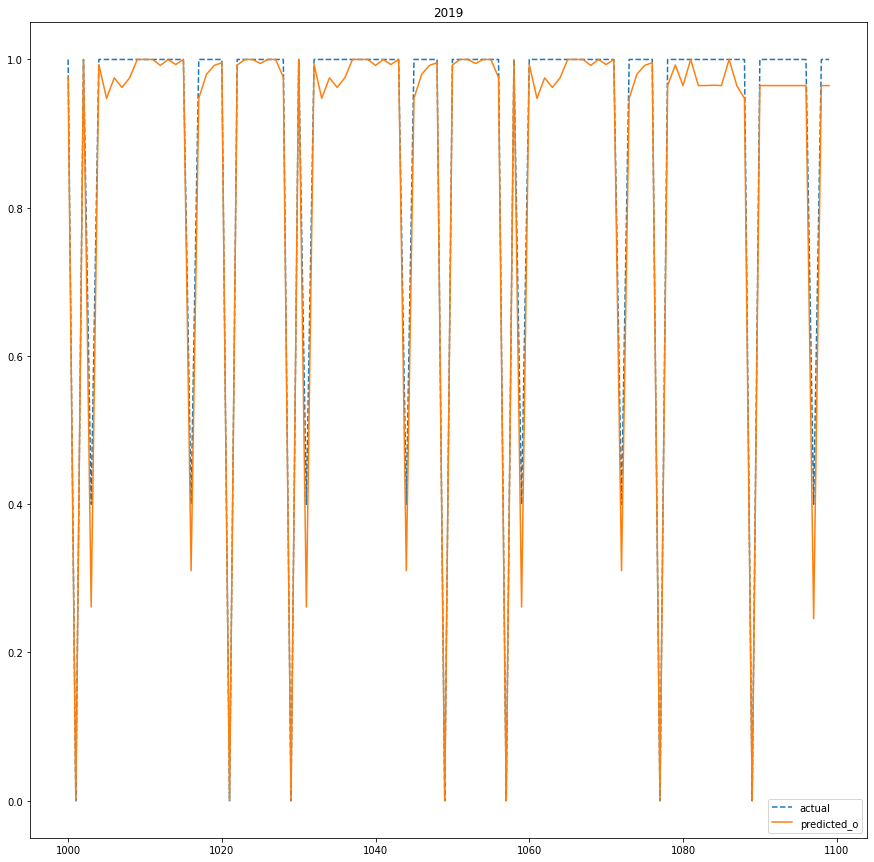

In [351]:
sz = 15
sli_start = 1000
sli_end = 1100
x = range(0,len(y_actual_t[0]))

plt.figure(figsize=(sz,sz)) 
# plt.subplot(1, 3, 1)
plt.plot(x[sli_start:sli_end], y_actual_t[0][sli_start:sli_end], label='actual', linestyle='dashed')
plt.plot(x[sli_start:sli_end], y_orig_thresh_copy[0][sli_start:sli_end], label='predicted_o')
plt.legend()
plt.title('2019')
# plt.subplot(1, 3, 2)
# plt.plot(x[sli_start:sli_end], y_actual_t[1][sli_start:sli_end], label='actual', linestyle='dashed')
# plt.plot(x[sli_start:sli_end], y_orig_thresh_copy[1][sli_start:sli_end], label='predicted_o')
# plt.legend()
# plt.title('2020')
# plt.subplot(1, 3, 3)
# plt.plot(x[sli_start:sli_end], y_actual_t[2][sli_start:sli_end], label='actual', linestyle='dashed')
# plt.plot(x[sli_start:sli_end], y_orig_thresh_copy[2][sli_start:sli_end], label='predicted_o')
# plt.legend()
# plt.title('2021')
plt.show()

In [348]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print("MEAN ABSOLUTE ERROR")
print(2019,mean_absolute_error(y_actual_t[0],y_orig_thresh_copy[0]))
print(2020,mean_absolute_error(y_actual_t[1],y_orig_thresh_copy[1]))
print(2021,mean_absolute_error(y_actual_t[2],y_orig_thresh_copy[2]))

print("MEAN SQUARED ERROR")
print(2019,mean_squared_error(y_actual_t[0],y_orig_thresh_copy[0]))
print(2020,mean_squared_error(y_actual_t[1],y_orig_thresh_copy[1]))
print(2021,mean_squared_error(y_actual_t[2],y_orig_thresh_copy[2]))

print("r2 score")
print(2019,r2_score(y_actual_t[0],y_orig_thresh_copy[0]))
print(2020,r2_score(y_actual_t[1],y_orig_thresh_copy[1]))
print(2021,r2_score(y_actual_t[2],y_orig_thresh_copy[2]))

MEAN ABSOLUTE ERROR
2019 0.01810578723611865
2020 0.0553133361350033
2021 0.09183957800080343
MEAN SQUARED ERROR
2019 0.0014108408491184934
2020 0.011255602566366547
2021 0.02288217645714669
r2 score
2019 0.9839146794365335
2020 0.8618330793985083
2021 0.6119862525627016


In [349]:
def get_reconstructed_accuracies(y_actual_full, measure, step_index):
    y_orig_thresh_dropped = df_train_orig[concol].mean()
    y_orig_thresh_combined = (y_actual_t[step_index]).append(y_orig_thresh_dropped)
    if measure == 'mae': 
#         print("MEAN ABSOLUTE ERROR")
        print(mean_absolute_error(y_actual_full[step_index],y_orig_thresh_combined))
    elif measure == 'rmse': 
#         print("ROOT MEAN SQUARED ERROR")
        print(mean_squared_error(y_actual_full[step_index],y_orig_thresh_combined))
    elif measure == 'r2': 
#         print("R2 Score")
        print(r2_score(y_actual_full[step_index],y_orig_thresh_combined))
    
    

In [350]:
get_reconstructed_accuracies(df_test_orig.T, 'mae', 0)
get_reconstructed_accuracies(df_test_orig.T, 'mae', 1)
get_reconstructed_accuracies(df_test_orig.T, 'mae', 2)
print()
get_reconstructed_accuracies(df_test_orig.T, 'rmse', 0)
get_reconstructed_accuracies(df_test_orig.T, 'rmse', 1)
get_reconstructed_accuracies(df_test_orig.T, 'rmse', 2)
print()
get_reconstructed_accuracies(df_test_orig.T, 'r2', 0)
get_reconstructed_accuracies(df_test_orig.T, 'r2', 1)
get_reconstructed_accuracies(df_test_orig.T, 'r2', 2)

0.23011957333565378
0.22015053623093825
0.19814150115657653

0.20377222123812214
0.1913467460990792
0.1572536253727927

-1.0710059281082227
-1.1123600359596857
-1.1810381753378314
